In [2]:
# data
import pandas as pd

data = pd.read_csv('housing.csv')
data.head()

,Sale Date,Sale Price,sale_reason,sale_instrument,sale_warning,sitetype,addr_full,zip5,ctyname,postalctyn,...,bedrooms,bath_full_count,bath_half_count,bath_3qtr_count,year_built,year_renovated,current_zoning,sq_ft_lot,prop_type,present_use
0,1/3/2006,698000,1,3,NaN,R1,17021 NE 113TH CT,98052,REDMOND,REDMOND,...,4,2,1,0,2003,0,R4,6635,R,2
1,1/3/2006,649990,1,3,NaN,R1,11927 178TH PL NE,98052,REDMOND,REDMOND,...,4,2,0,1,2006,0,R4,5570,R,2
2,1/3/2006,572500,1,3,NaN,R1,13315 174TH AVE NE,98052,NaN,REDMOND,...,4,1,1,1,1987,0,R6,8444,R,2
3,1/3/2006,420000,1,3,NaN,R1,3303 178TH AVE NE,98052,REDMOND,REDMOND,...,3,1,0,1,1968,0,R4,9600,R,2
4,1/3/2006,369900,1,3,15,R1,16126 NE 108TH CT,98052,REDMOND,REDMOND,...,3,1,0,1,1980,0,R6,7526,R,2


In [3]:
# variables
salePrice = data['Sale Price']
bathrooms = data['bath_full_count']
squareft = data['square_feet_total_living']
zipcode = data['zip5']
grade = data['building_grade']

In [47]:
import matplotlib.pyplot as plt
import numpy as np

def plotting(var, rangemin, rangemax, xlab, ylab, title):
    '''
    var: histogram variable
    rangemin: min x axis
    rangemax: max x axis
    '''
    n, bins, patches = plt.hist(x=var, bins='auto', color='blue',
                                alpha=0.7, rwidth=0.85, range = [rangemin, rangemax])
    plt.grid(axis='y', alpha=0.75)
    plt.xlabel(xlab)
    plt.ylabel(ylab)
    plt.title(title)

    maxfreq = n.max()
    # Set a clean upper y-axis limit.
    plt.ylim(ymax=np.ceil(maxfreq / 10) * 10 if maxfreq % 10 else maxfreq + 10)




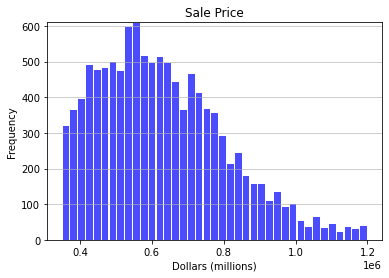

In [48]:
# hist sale price
plotting(salePrice, 350000, 1200000, 'Dollars (millions)', 'Frequency', 'Sale Price')

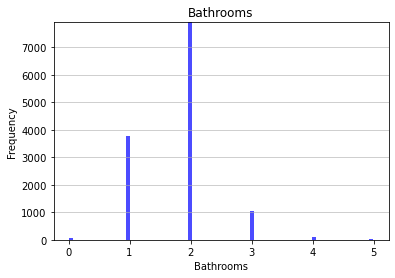

In [49]:
# bathrooms
plotting(bathrooms, 0, 5, 'Bathrooms', 'Frequency', 'Bathrooms')

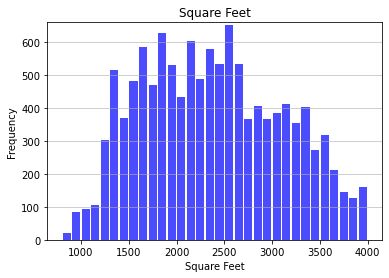

In [50]:
# sqft
plotting(squareft, 800, 4000, 'Square Feet', 'Frequency', 'Square Feet')

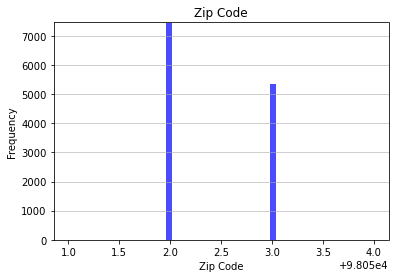

In [51]:
# zip code
plotting(zipcode, 98051, 98054, 'Zip Code', 'Frequency', 'Zip Code')

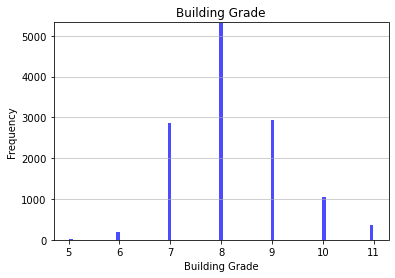

In [52]:
# grade
plotting(grade, 5, 11, 'Building Grade', 'Frequency', 'Building Grade')

In [46]:
# mean
import statistics
print(statistics.mean(salePrice))
print(statistics.mean(bathrooms))
print(statistics.mean(squareft))

660737.7496307812
1.7984453944811505
2539.5061795569372


In [59]:
big_bath = bathrooms[bathrooms > 2]
small_bath = bathrooms[bathrooms <= 2]

0    2
1    2
2    1
3    1
4    1
Name: bath_full_count, dtype: int64

In [68]:
# pmf
import thinkstats2 
import thinkplot

hist_big_bath = thinkstats2.Hist(big_bath)
hist_small_bath = thinkstats2.Hist(small_bath)

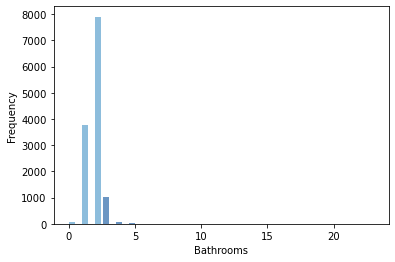

<Figure size 576x432 with 0 Axes>

In [69]:
width = 0.45
thinkplot.PrePlot(2)
thinkplot.Hist(hist_big_bath, align = 'right', width = width)
thinkplot.Hist(hist_small_bath, align = 'left', width = width)
thinkplot.Show(xlabel = 'Bathrooms', ylabel = 'Frequency')

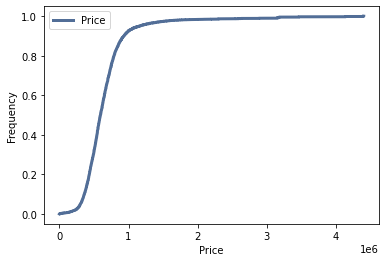

<Figure size 576x432 with 0 Axes>

In [72]:
# cdf 
salePrice_cdf = thinkstats2.Cdf(salePrice, label = 'Price')
thinkplot.Cdf(salePrice_cdf)
thinkplot.Show(xlabel = 'Price', ylabel = 'Frequency')

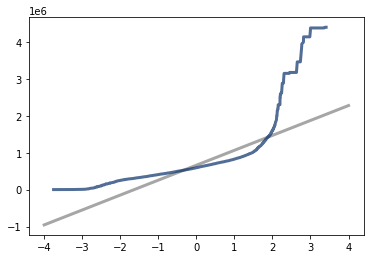

In [75]:
# normal prob plot
def MakeNormalPlot(weights):
    mean = weights.mean()
    std = weights.std()
    
    xs = [-4,4]
    fxs, fys = thinkstats2.FitLine(xs, inter = mean, slope = std)
    thinkplot.Plot(fxs, fys, color = 'gray', label = 'model')
    
    xs, ys = thinkstats2.NormalProbability(weights)
    thinkplot.Plot(xs, ys, label = 'Prices')
    
MakeNormalPlot(salePrice)

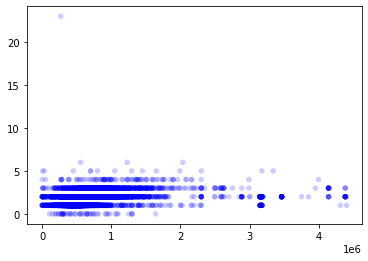

In [79]:
# scatter plot
thinkplot.Scatter(salePrice, bathrooms)

In [81]:
# covariance
def Cov(xs, ys, meanx = None, meany = None):
    xs = np.asarray(xs)
    ys = np.asarray(ys)
    
    if meanx is None:
        meanx = np.mean(xs)
    if meany is None:
        meany = np.mean(ys)
        
    cov = np.dot(xs-meanx, ys-meany)/len(xs)
    return cov

Cov(salePrice, bathrooms)

74957.82742266737

In [83]:
# pearson
np.corrcoef(salePrice, bathrooms)

array([[1.        , 0.28484899],
       [0.28484899, 1.        ]])

In [86]:
# spearman
def SpearmanCorr(xs, ys):
    xranks = pd.Series(xs)
    yranks = pd.Series(ys)
    return xs.corr(ys, method = 'spearman')

SpearmanCorr(salePrice, bathrooms)

0.4356509765385682

In [136]:
# hypothesis test
class BathTest(thinkstats2.HypothesisTest):
    
    def Test(self, data):
        small_bath, big_bath = data
        test_stat = abs(small_bath - big_bath)
        return test_stat
    
    def RunModel(self):
        small_bath, big_bath = self.data
        n = small_bath + big_bath
        sample = [random.choice('HT') for _ in range(n)]
        test_hist = thinkstats2.Hist(sample)
        data = test_hist['H'], test_hist['T']
        return data

In [137]:
small_bath_price = small_bath * salePrice
big_bath_price = big_bath * salePrice

small_bath_price.mean(), big_bath_price.mean()


(1092429.2052353343, 3025340.4080914687)

In [142]:
# regression with fitted line
def LeastSquares(xs, ys):
    meanx, varx = MeanVar(xs)
    meany = ys.mean()
    
    slope = Cov(xs,ys,meanx,meany)/varx
    inter = meany - slope * meanx
    
    return inter, slope

In [143]:
def FitLine(xs, inter, slope):
    fitxs = np.sort(xs)
    fitys = inter + slope * fitys
    return fitxs, fitys

In [148]:
inter, slope = thinkstats2.LeastSquares(salePrice, bathrooms)

fitxs, fitys = thinkstats2.FitLine(salePrice, inter, slope)
print(inter,slope)

1.4955461354366069 4.584258417409977e-07
